In [2]:
from preprocessing_utils import preprocess_data, preprocess_validation_data
import sys
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import SGDClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from itertools import combinations

In [3]:
# Reading in the training/test data
file_path = '../data/project_adult.csv'

try:
    df = pd.read_csv(file_path, header=None, encoding='utf-8')
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# preprocess training data
X, y = preprocess_data(df)

Successfully loaded '../data/project_adult.csv'. First 5 rows:
        0    1                 2       3          4              5   \
0      NaN  age         workclass  fnlwgt  education  education-num   
1   5514.0   33         Local-gov  198183  Bachelors             13   
2  19777.0   36           Private   86459  Assoc-voc             11   
3  10781.0   58  Self-emp-not-inc  203039        9th              5   
4  32240.0   21           Private  180190  Assoc-voc             11   

                   6                7              8      9       10  \
0      marital-status       occupation   relationship   race     sex   
1       Never-married   Prof-specialty  Not-in-family  White  Female   
2  Married-civ-spouse  Exec-managerial        Husband  White    Male   
3           Separated     Craft-repair  Not-in-family  White    Male   
4  Married-civ-spouse  Farming-fishing        Husband  White    Male   

             11            12              13              14      15  
0  ca

,original_index,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male,class
0,1,-0.408756,0.080051,1.133702,-0.145715,-0.217998,0.779460,0,1,0,...,0,0,0,0,1,0,0,1,0,1
1,2,-0.188857,-0.981653,0.357049,-0.145715,4.457168,0.779460,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,3,1.423734,0.126197,-1.972910,-0.145715,-0.217998,-0.031510,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,-1.288351,-0.090935,0.357049,-0.145715,-0.217998,0.455072,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5,-0.848554,0.856334,-0.031277,-0.145715,-0.217998,-0.031510,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [4]:
# Reading in the validation data

file_path = '../data/project_validation_inputs.csv'

try:
    df_test = pd.read_csv(file_path, header=None, encoding='utf-8')
    print(f"Successfully loaded '{file_path}'. First 5 rows:")
    print(df_test.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty or contains no data.")
except pd.errors.ParserError as e:
    print(f"Error: A parsing error occurred while reading '{file_path}': {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# preprocess test data
X_df_test = preprocess_validation_data(df_test)

Successfully loaded '../data/project_validation_inputs.csv'. First 5 rows:
        0    1          2       3             4              5   \
0      NaN  age  workclass  fnlwgt     education  education-num   
1  14160.0   27    Private  160178  Some-college             10   
2  27048.0   45  State-gov   50567       HS-grad              9   
3  28868.0   29    Private  185908     Bachelors             13   
4   5667.0   30    Private  190040     Bachelors             13   

                   6                  7              8      9       10  \
0      marital-status         occupation   relationship   race     sex   
1            Divorced       Adm-clerical  Not-in-family  White  Female   
2  Married-civ-spouse    Exec-managerial           Wife  White  Female   
3  Married-civ-spouse    Exec-managerial        Husband  Black    Male   
4       Never-married  Machine-op-inspct  Not-in-family  White  Female   

             11            12              13              14  
0  capital-ga

,original_index,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Missing,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male
0,1,-0.851191,-0.277853,-0.031693,-0.147225,-0.211274,-0.212164,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,0.469374,-1.304090,-0.421896,-0.147225,-0.211274,-0.051009,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,-0.704461,-0.036955,1.138915,-0.147225,-0.211274,1.157652,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,-0.631097,0.001731,1.138915,-0.147225,-0.211274,-0.051009,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,-0.704461,-0.004766,-0.031693,0.128973,-0.211274,0.754765,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# 3. Implement Logistic Regression and SVM using scikit-learn
- Train Logistic Regression and SVM models using scikit-learn.
- Find the accuracy of your best models from both algorithms
- Use best performing models to predict outputs for project_validation_inputs.
- Select 2 features and visualize the decision boundaries.

In [5]:
# split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_cols = [col for col in X_train.columns if col not in ['original_index', 'workclass_Never-worked', 'native-country_Holand-Netherlands', 'native-country_Outlying-US(Guam-USVI-etc)']]

### Logistic Regression:

In [6]:
# plot confusion matrix
def plot_confusion_matrix(cm, y_true):
    """
    Plots the confusion matrix using a heatmap.

    Args:
        cm (np.ndarray): The confusion matrix.
        y_true (np.ndarray): The true labels for the test data.
    """
    # Create the plot using pure matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Use imshow to create the heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the unique class names
           xticklabels=np.unique(y_true), yticklabels=np.unique(y_true),
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

In [7]:
# Initialize the model with default parameters.
# had to increase the max_iters to get convergence
model = LogisticRegression(solver='lbfgs', random_state=42, max_iter=300)
model.fit(X_train[feature_cols], y_train['class'].values.ravel())

LogisticRegression(max_iter=300, random_state=42)

In [8]:
# Make predictions on the scaled test set
y_pred = model.predict(X_test[feature_cols])


--- Confusion Matrix ---
[[3691  313]
 [ 477  729]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4004
           1       0.70      0.60      0.65      1206

    accuracy                           0.85      5210
   macro avg       0.79      0.76      0.78      5210
weighted avg       0.84      0.85      0.84      5210



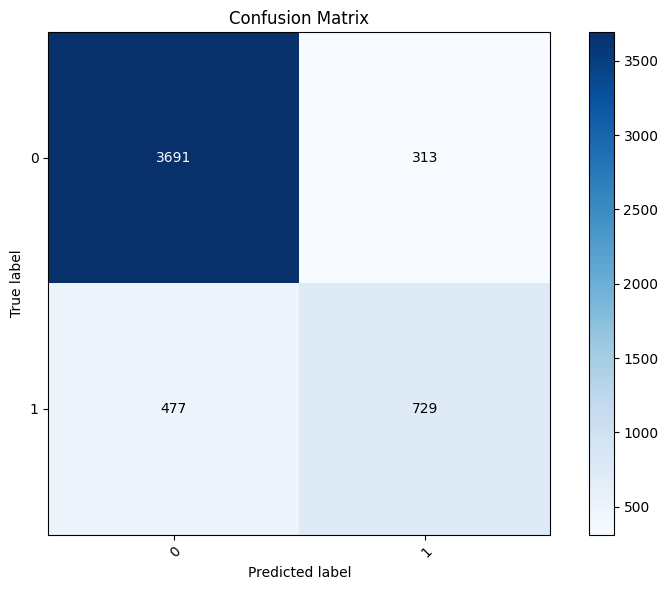

In [9]:
# Generate and display the confusion matrix and classification report
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test['class'], y_pred)
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test['class'], y_pred))

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test['class'])

In [10]:
# Grid search code pulled from in class activities

# We use GridSearchCV to find the best hyperparameters for the model.
# Cross-validation (CV) helps to get a more robust estimate of model performance
# and prevents overfitting to a single train-test split.

# Define the parameter grid to search over.
# np.logspace(-4,4,2-) tells GridSearchCV to test 20 values for C eenly spaced on logarithmic scale from 10^-4 to 10^4
param_grid = {
    'C': np.logspace(-2, 2, 20),  # Inverse of regularization strength
}

# Initialize GridSearchCV with a 5-fold cross-validation strategy.
grid_search = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', random_state=42, max_iter=300),
    param_grid=param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize for
    n_jobs=-1,                # Use all available CPU cores
    verbose=1                 # Print progress
)

print("Starting hyperparameter search. This may take a moment...")
grid_search.fit(X_train[feature_cols], y_train['class'].values.ravel())

Starting hyperparameter search. This may take a moment...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02])},
             scoring='accuracy', verbose=1)


--- Best Model Found by GridSearchCV ---
Best parameters: {'C': np.float64(0.7847599703514611)}
Best cross-validation accuracy: 0.8509

 Final evaluation of the best model on the test set...
Final accuracy on test set: 0.8489

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4004
           1       0.70      0.61      0.65      1206

    accuracy                           0.85      5210
   macro avg       0.79      0.76      0.78      5210
weighted avg       0.84      0.85      0.84      5210


Confusion Matrix:
[[3693  311]
 [ 476  730]]


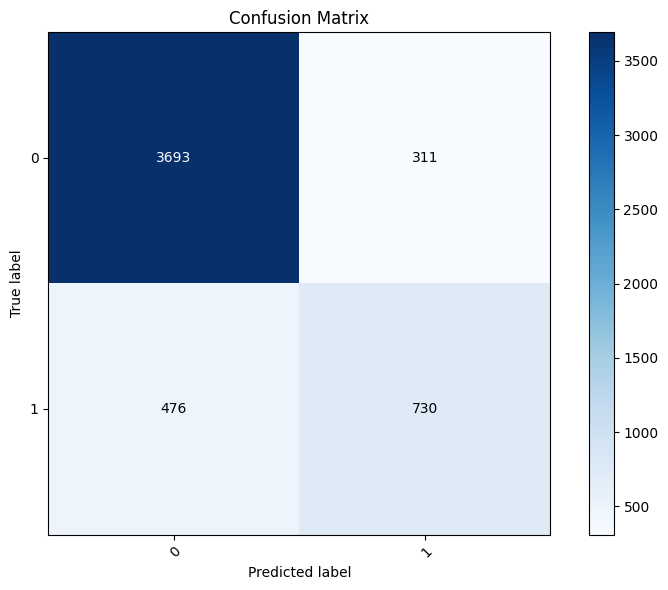

In [11]:
# Get the best estimator from the search.
best_model = grid_search.best_estimator_

print("\n--- Best Model Found by GridSearchCV ---")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

print("\n Final evaluation of the best model on the test set...")
# Predict using the best model found during the search.
final_y_pred = best_model.predict(X_test[feature_cols])
final_accuracy = accuracy_score(y_test['class'], final_y_pred)

print(f"Final accuracy on test set: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test['class'], final_y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test['class'], final_y_pred)
print(cm)

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test['class'])

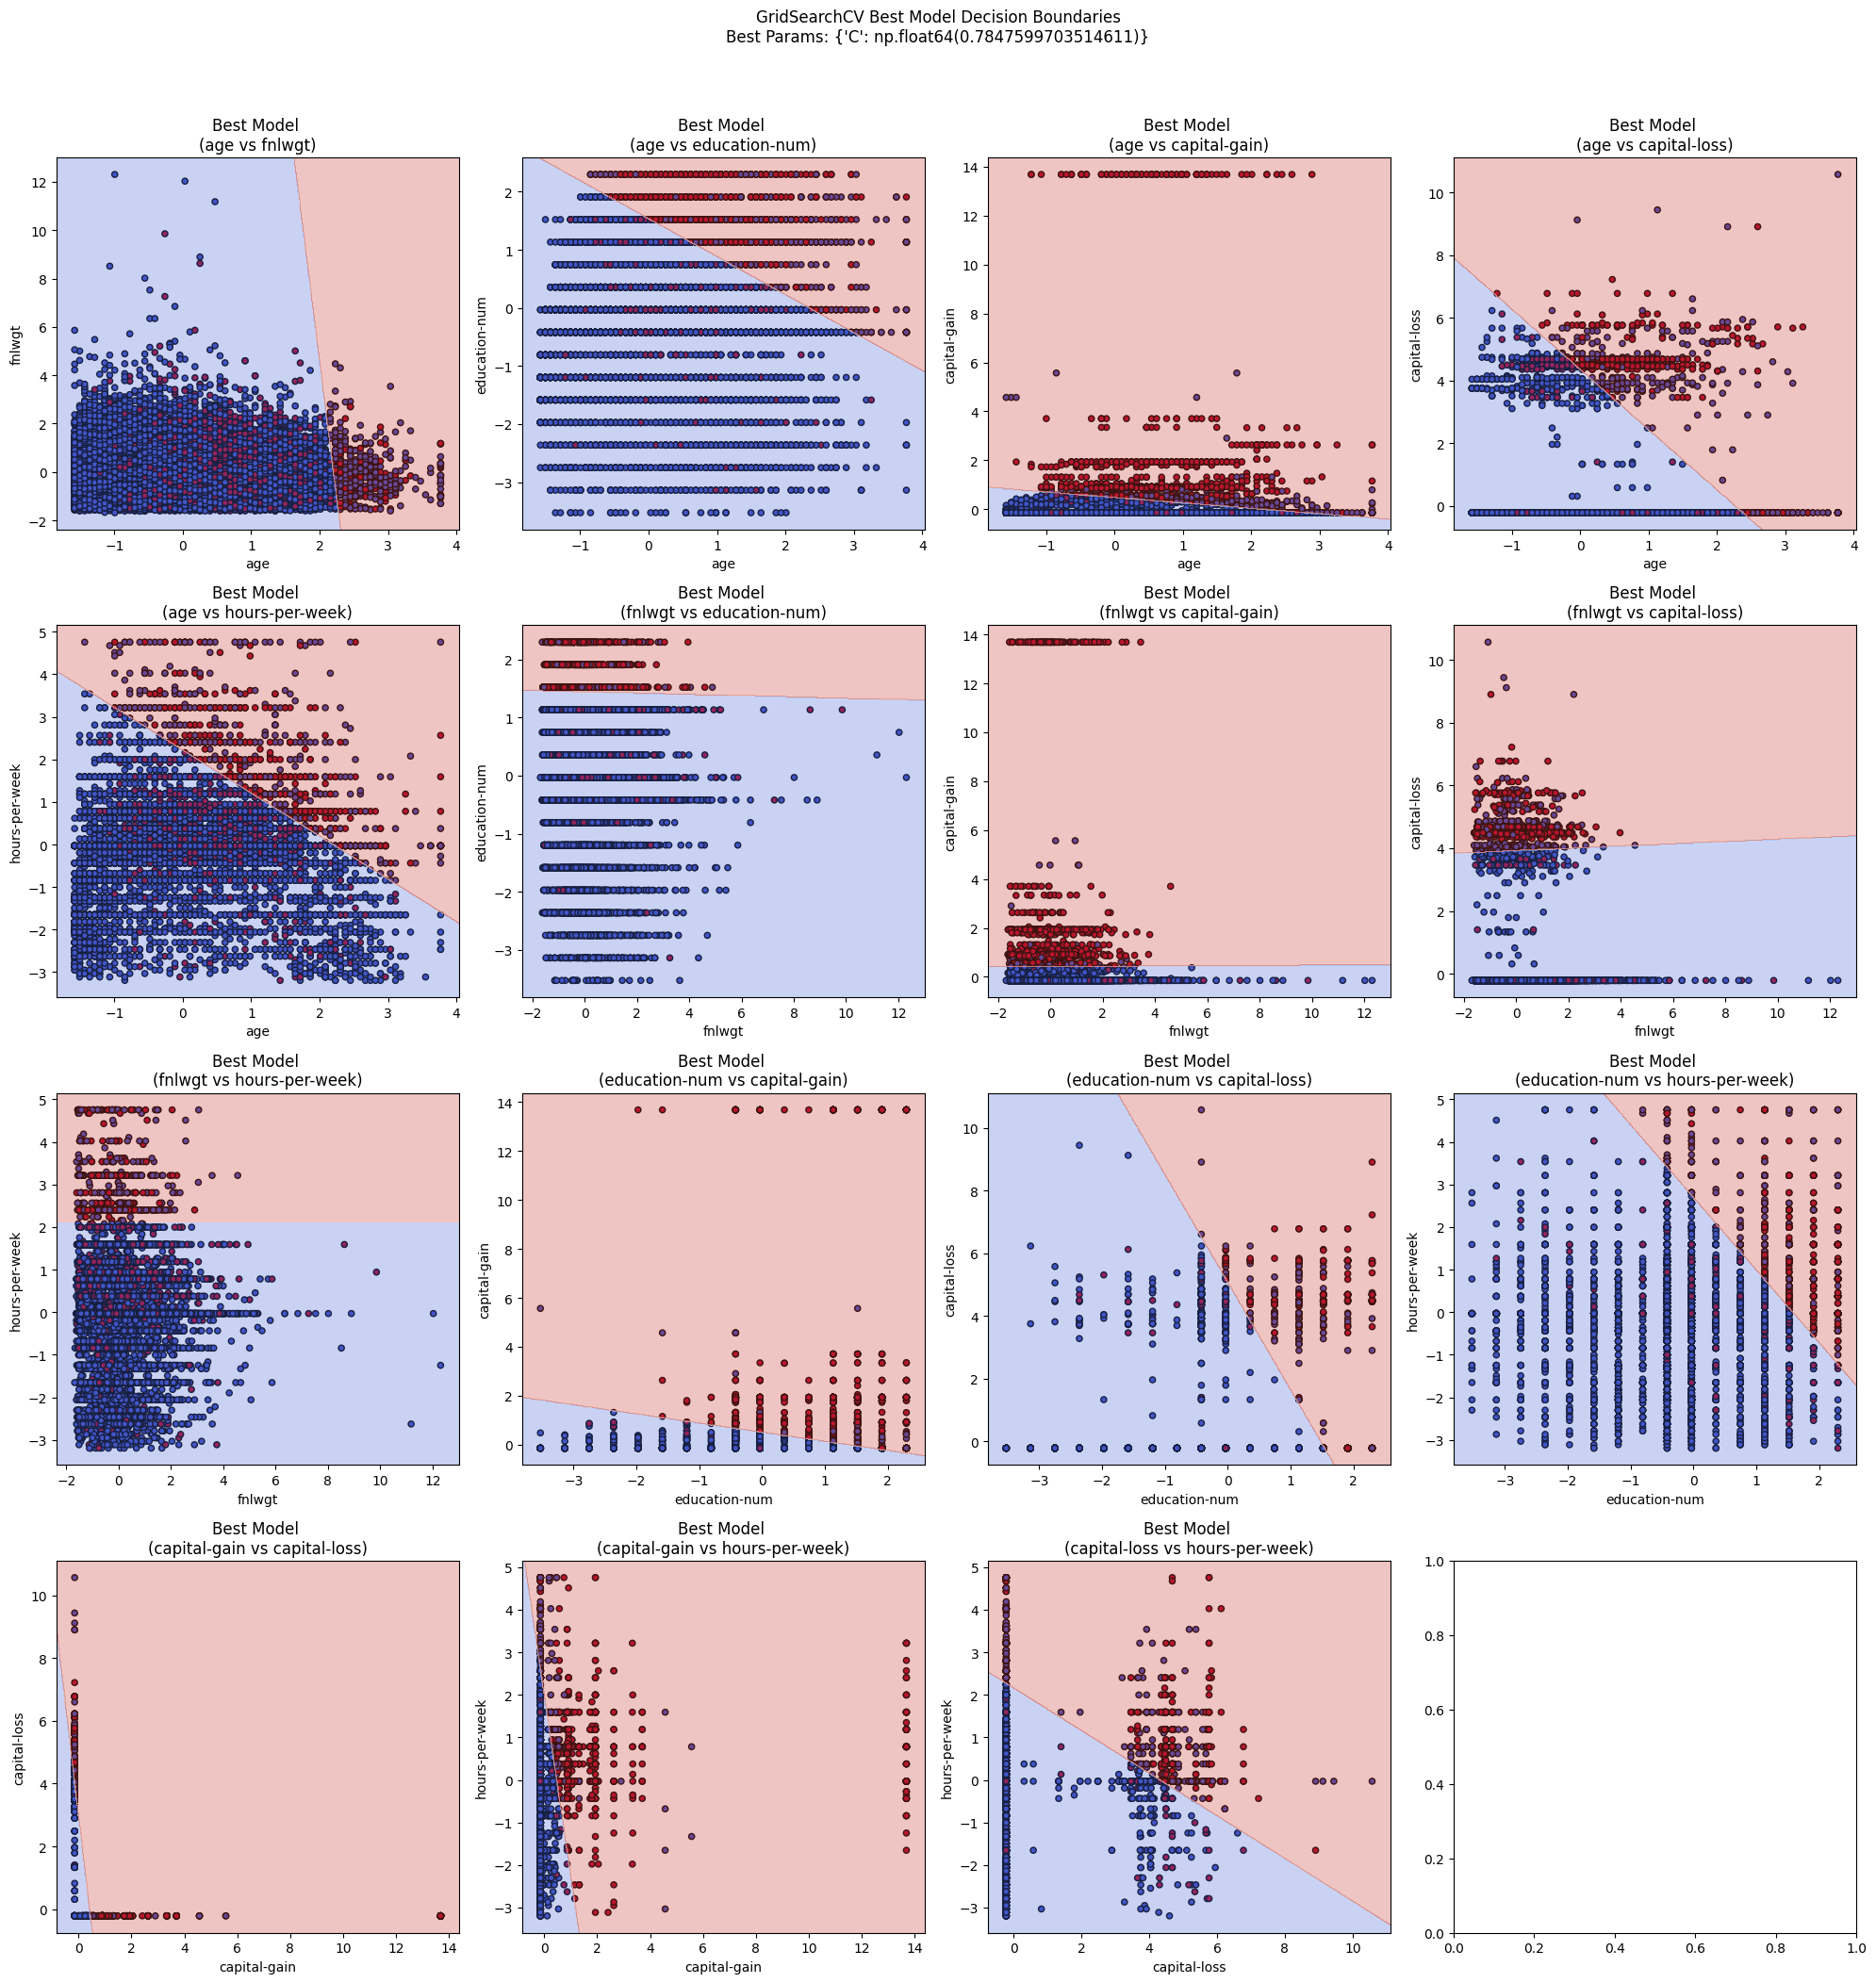

In [ ]:
# visualize decision boundary for best log regression model
# code developed from examples during in-class activities
# plotting all combos of numeric columns

numeric_cols = ['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week']

# get best model from gridsearch
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

n_features = X_train[numeric_cols].shape[1]
feature_pairs = list(combinations(range(n_features), 2))
n_pairs = len(feature_pairs)

y_encoded = y_train['class'].values

n_cols = int(np.ceil(np.sqrt(n_pairs)))
n_rows = int(np.ceil(n_pairs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()  # Flatten for easy indexing

# Ensure axes is an array even for a single subplot
if n_pairs == 1:
    axes = [axes]

for j, (f1_idx, f2_idx) in enumerate(feature_pairs):
    ax = axes[j]
        
    # Select the two features for the current plot
    X_num_only = X_train[numeric_cols]   # only the numeric columns
    X_pair = X_num_only.iloc[:, [f1_idx, f2_idx]]
    f1_name = X_num_only.columns[f1_idx]
    f2_name = X_num_only.columns[f2_idx]

    # Use the best model from GridSearchCV
    model = best_model
        
    # Since the best model was trained on the full dataset, we'll retrain
    # a new instance of it on just the two features for plotting purposes.
    # This is the most reliable way to ensure the decision boundary is correct.
    # Retrain logistic regression on just the two features
    plot_model = LogisticRegression(
        solver='lbfgs',
        C=best_params.get('C'),
        random_state=42,
        max_iter=300
        )
        
    plot_model.fit(X_pair.values, y_encoded)
        
    # Plot the data points
    ax.scatter(X_pair.iloc[:, 0], X_pair.iloc[:, 1], c=y_encoded, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    # Create and plot the decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = plot_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        
    # Set titles and labels
    ax.set_title(f"Best Model \n({f1_name} vs {f2_name})")
    ax.set_xlabel(f1_name)
    ax.set_ylabel(f2_name)
    ax.set_aspect('auto') # This helps the graphs format evenly


plt.tight_layout()

plt.suptitle(f"GridSearchCV Best Model Decision Boundaries\nBest Params: {best_params}", y=1.05)
plt.show()


In [ ]:
# Implement best verson of Sklearn Logistic Regression on validation dataset

log_reg_best = LogisticRegression(solver='lbfgs', C=best_params.get('C'), random_state=42, max_iter=300).fit(X_train[feature_cols], y_train['class'].values.ravel())
y_pred_best_log_reg = log_reg_best.predict(X_df_test.loc[:,feature_cols])

df_log_reg_pred = pd.DataFrame({
    'original_index': X_df_test['original_index'].values,
    'log_reg_pred': y_pred_best_log_reg
})


display(df_log_reg_pred.head())

,original_index,log_reg_pred
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


### SVM:

In [ ]:
def plot_svm_decision_boundaries_multi_feature(X, y, kernels, title_prefix="", C=1.0, gamma='scale'):
    """
    Plots the decision boundaries for multiple SVM models and multiple feature pairs,
    automatically handling non-numerical target labels and different data types for y.

    Args:
        X (pd.DataFrame): The input features (must have at least 2 columns).
        y (pd.Series or np.ndarray or pd.DataFrame): The target labels.
        kernels (list): A list of kernel strings (e.g., 'linear', 'rbf', 'poly').
        title_prefix (str): A prefix for the plot titles.
        C (float): The regularization parameter.
        gamma (str or float): Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    """

    n_features = X.shape[1]
    if n_features < 2:
        raise ValueError("This function requires at least 2 features for plotting combinations.")

    feature_pairs = list(combinations(range(n_features), 2))
    n_pairs = len(feature_pairs)
    n_kernels = len(kernels)

    fig, axes = plt.subplots(n_pairs, n_kernels, figsize=(n_kernels * 6, n_pairs * 5),
                         constrained_layout=True)

    if n_pairs == 1 and n_kernels == 1:
        axes = np.array([[axes]])
    elif n_pairs == 1:
        axes = axes.reshape(1, -1)
    elif n_kernels == 1:
        axes = axes.reshape(-1, 1)


    for i, (f1_idx, f2_idx) in enumerate(feature_pairs):
        for j, kernel in enumerate(kernels):
            ax = axes[i, j]

            # Select the two features for the current plot
            X_pair = X.iloc[:, [f1_idx, f2_idx]]
            f1_name = X.columns[f1_idx]
            f2_name = X.columns[f2_idx]

            # Train the SVM model on the selected features
            if kernel == 'poly':
                model = SVC(kernel=kernel, C=C, gamma=gamma, degree=3)
            else:
                model = SVC(kernel=kernel, C=C, gamma=gamma)
            
            # FIT THE MODEL WITH .values TO AVOID THE WARNING
            model.fit(X_pair.values, y_encoded)

            # Plot the data points with encoded labels
            ax.scatter(X_pair.iloc[:, 0], X_pair.iloc[:, 1], c=y_encoded, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

            # Create and plot the decision boundary
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                                 np.linspace(ylim[0], ylim[1], 500))
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
            
            # Highlight the support vectors
            ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50,
                       linewidth=0.75, facecolors='none', edgecolors='k')
            
            # Set titles and labels
            ax.set_title(f"{title_prefix} {kernel.capitalize()} ({f1_name} vs {f2_name})")
            ax.set_xlabel(f1_name)
            ax.set_ylabel(f2_name)
            ax.set_aspect('auto')

    plt.show()


--- Confusion Matrix ---
[[3712  292]
 [ 486  720]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4004
           1       0.71      0.60      0.65      1206

    accuracy                           0.85      5210
   macro avg       0.80      0.76      0.78      5210
weighted avg       0.84      0.85      0.85      5210



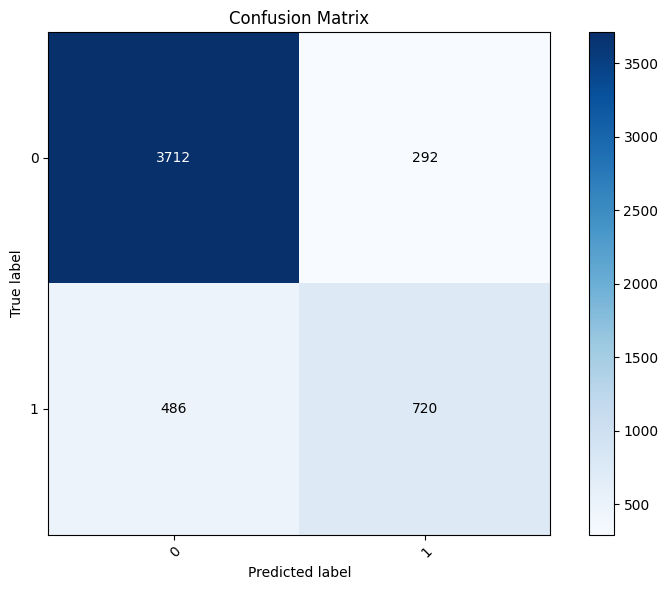

In [15]:
# Train with linear kernel
model_linear = SVC(kernel='linear', C=1)
model_linear.fit(X_train.loc[:, feature_cols].values, y_train['class'].values)

# Make predictions on the scaled test set 
y_pred = model_linear.predict(X_test.loc[:, feature_cols].values)

# Generate and display the confusion matrix and classification report
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test['class'], y_pred)  
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test['class'], y_pred))  

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test['class'])  

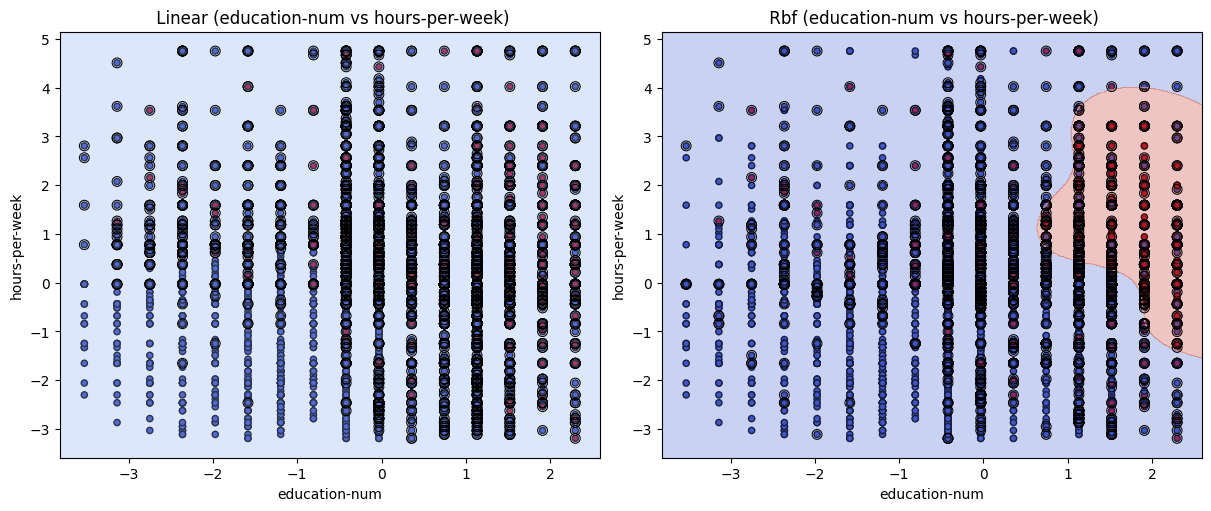

In [16]:
# Plot decision boundaries for different kernels (ONLY 2 FEATURES)
plot_svm_decision_boundaries_multi_feature(X_train.loc[:, ['education-num', 'hours-per-week']], 
                                           y_train['class'], 
                                           kernels=['linear', 'rbf'])

### Testing each kernel individual for the sake of runtimes and tuning
#### Using loops instead of gridsearch due to runtimes being very long

In [18]:
# linear kernel CV loop

C_list = [0.1, 1, 10]

for C in C_list:
    model = SVC(kernel = 'linear', C = C)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train[feature_cols].values, y_train['class'].values, cv=3, scoring='accuracy')
    
    print(f"C: {C}, CV Accuracy: {np.mean(scores):.4f}")
    

C: 0.1, CV Accuracy: 0.8506
C: 1, CV Accuracy: 0.8511
C: 10, CV Accuracy: 0.8515


In [25]:
# rbf kernel CV loop

C_list = [0.1, 1, 10]
gamma_list = ['scale', 'auto']

for C in C_list:
    for gamma in gamma_list:
        model = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        # Perform 5-fold cross-validation
        scores = cross_val_score(model, X_train[feature_cols].values, y_train['class'].values, cv=3, scoring='accuracy')
    
        print(f"Gamma: {gamma}, C: {C}, CV Accuracy: {np.mean(scores):.4f}")

Gamma: scale, C: 0.1, CV Accuracy: 0.8473
Gamma: auto, C: 0.1, CV Accuracy: 0.8378
Gamma: scale, C: 1, CV Accuracy: 0.8549
Gamma: auto, C: 1, CV Accuracy: 0.8497
Gamma: scale, C: 10, CV Accuracy: 0.8498
Gamma: auto, C: 10, CV Accuracy: 0.8529


In [26]:
# poly kernel CV loop

C_list = [0.1, 1, 10]

for C in C_list:
    model = SVC(kernel = 'poly', C = C, gamma = 'scale')
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train[feature_cols].values, y_train['class'].values, cv=3, scoring='accuracy')
    
    print(f"C: {C}, CV Accuracy: {np.mean(scores):.4f}")

C: 0.1, CV Accuracy: 0.8417
C: 1, CV Accuracy: 0.8517
C: 10, CV Accuracy: 0.8449


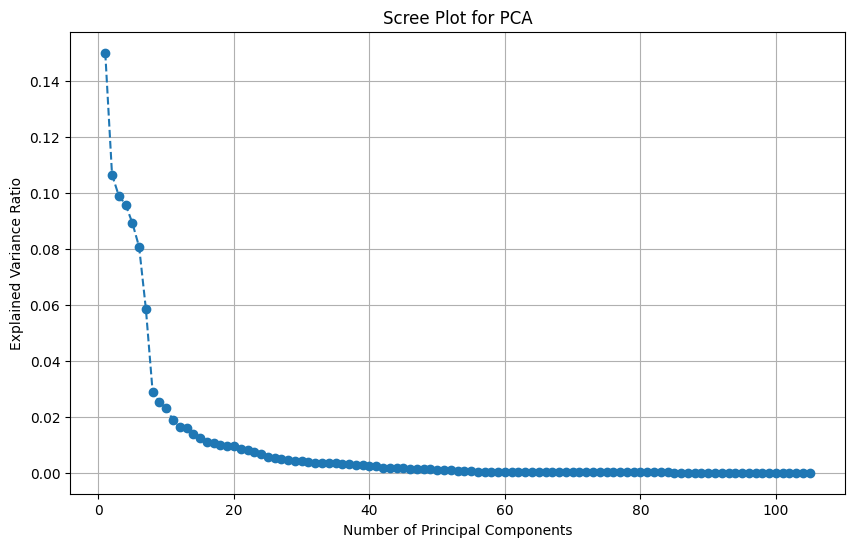

In [ ]:
# Perform PCA without assuming a fixed number of components
# By default, PCA will compute all n_features components.
pca = PCA()
pca.fit(X_train[feature_cols]) # this is on x train to compare performance 

plt.figure(figsize=(10, 6))
explained_variance_ratio = pca.explained_variance_ratio_
components = range(1, len(explained_variance_ratio) + 1)
plt.plot(components, explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()

# only the first few principal components make a difference in the performance

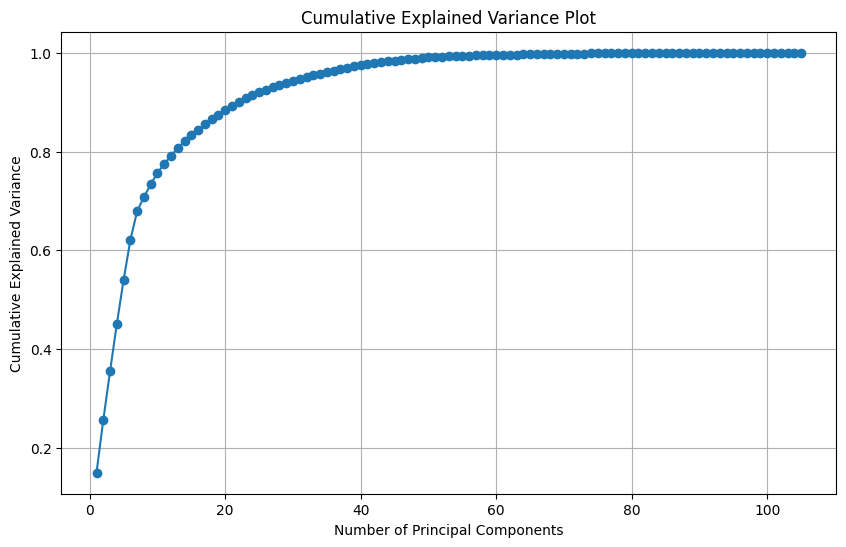

In [ ]:
# reate the Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(components, cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)

# there is not a significant increase in the explained variance after around 30-40 components

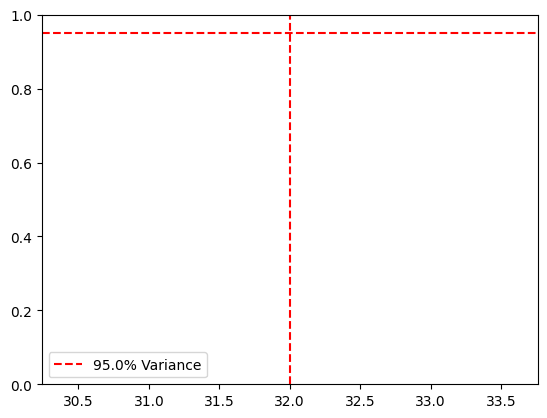

In [ ]:
# Highlight a target variance, e.g., 95%
target_variance = 0.95
num_components_95 = np.argmax(cumulative_variance >= target_variance) + 1
plt.axvline(x=num_components_95, color='r', linestyle='--', label=f'{target_variance*100}% Variance')
plt.axhline(y=target_variance, color='r', linestyle='--')
plt.legend()
plt.show()

# to reach the target 95%, we need 32 principal components

In [30]:
# Find the number of components for a target variance programmatically
num_components_for_95_percent = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f"Number of components to explain 95% of variance: {num_components_for_95_percent}")

Number of components to explain 95% of variance: 32


In [31]:
# use number of components created in PCA to plot
# Create a DataFrame for the principal components for easier plotting
pca = PCA(n_components=32)
X_train_pca = pca.fit_transform(X_train[feature_cols]) # Fit and transform training data
X_test_pca = pca.transform(X_test[feature_cols]) # Transform the test data using the fitted PCA

pca_df = pd.DataFrame(data=X_train_pca)
pca_df['target'] = y_train['class'].values.ravel()

In [32]:
# linear kernel with PCA CV loop

C_list = [0.1, 1, 10]

for C in C_list:
    model = SVC(kernel = 'linear', C = C)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train_pca, y_train['class'].values, cv=3, scoring='accuracy')
    
    print(f"C: {C}, CV Accuracy: {np.mean(scores):.4f}")

    

C: 0.1, CV Accuracy: 0.8469
C: 1, CV Accuracy: 0.8473
C: 10, CV Accuracy: 0.8473


In [33]:
# rbf kernel with PCA CV loop

C_list = [0.1, 1, 10]
gamma_list = ['scale', 'auto']

for C in C_list:
    for gamma in gamma_list:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
    
        # Perform 5-fold cross-validation
        scores = cross_val_score(model, X_train_pca, y_train['class'].values, cv=3, scoring='accuracy')
    
        print(f"Gamma: {gamma}, C: {C}, CV Accuracy: {np.mean(scores):.4f}")


Gamma: scale, C: 0.1, CV Accuracy: 0.8484
Gamma: auto, C: 0.1, CV Accuracy: 0.8443
Gamma: scale, C: 1, CV Accuracy: 0.8525
Gamma: auto, C: 1, CV Accuracy: 0.8514
Gamma: scale, C: 10, CV Accuracy: 0.8484
Gamma: auto, C: 10, CV Accuracy: 0.8514


In [34]:
# poly kernel with PCA CV loop

C_list = [0.1, 1, 10]

for C in C_list:
    model = SVC(kernel='poly', C=C, gamma='scale')
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train_pca, y_train['class'].values, cv=3, scoring='accuracy')
    
    print(f"C: {C}, CV Accuracy: {np.mean(scores):.4f}")


C: 0.1, CV Accuracy: 0.8327
C: 1, CV Accuracy: 0.8448
C: 10, CV Accuracy: 0.8399


In [ ]:
# Implement best verson of Sklearn Logistic Regression on validation dataset
# Version without PCA had higher accuracy with C = 1 and gamma = 'scale'

SVM_best = SVC(kernel='rbf', C=1, gamma='scale').fit(X_train[feature_cols], y_train['class'].values.ravel())
y_pred_best_SVM = SVM_best.predict(X_df_test.loc[:,feature_cols])

df_SVM_pred = pd.DataFrame({
    'original_index': X_df_test['original_index'].values,
    'SVM_pred': y_pred_best_SVM
})


display(df_SVM_pred.head())

,original_index,SVM_pred
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
